In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import *

import seaborn as sns

from PIL import Image, ImageDraw

In [3]:
N = 128
DAY_LENGTH = 24.0 # in hours
YEAR_LENGTH = 365.25 # in days
SIGMA = 5.670374419e-8

t0 = 370.0*DAY_LENGTH
t = 41.0

(longitude, lattitude) = np.meshgrid(np.linspace(-1,1,N), np.linspace(-1,1,N))

In [12]:
def dTdt(T, t, t0, albedo=0.3, emissivity=1.0, S0=1361, rho_aq=1025, c=3990, h=70):
    C = rho_aq * c * h

    utc_day = ((t0 + t)) % YEAR_LENGTH

    dec = np.deg2rad(-23.44*np.cos(np.deg2rad((YEAR_LENGTH - 5)/YEAR_LENGTH*(utc_day + 10))))
    local_day = (utc_day + 90.0/15.0 * longitude) % DAY_LENGTH

    utc_time = (utc_day % 1)
    hour_angle = 2*np.pi*((utc_time + 0.5*longitude) % 1 - 0.5)

    theta = (
        np.sin(0.5*np.pi*lattitude) * np.sin(dec) + 
        np.cos(0.5*np.pi*lattitude) * np.cos(dec) * np.cos(hour_angle)
    )
    theta = np.maximum(theta, 0)

    absorbed = (1 - albedo) * S0*theta
    olr = emissivity * SIGMA * T**4
    net_radiation = absorbed - olr
    
    return net_radiation / C

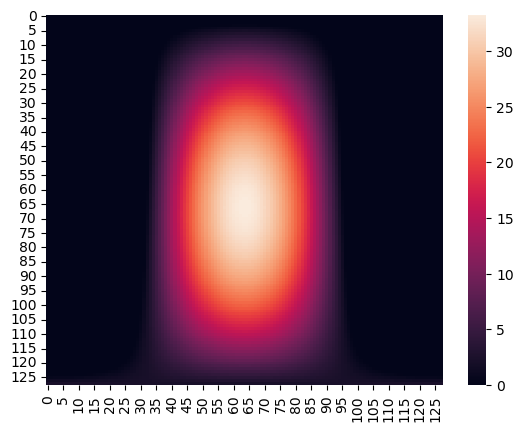

In [19]:
sns.heatmap(10**7*dTdt(np.ones((N,N))*20.0, 90.0, 0.5))
plt.show()